# **Atividade Análise de Dados**



**Nome:** Lucas Riello Galvão do Amaral

**Prontuário:** BT3013758

## **Obtenção dos Dados**


In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

sns.set_theme(style="whitegrid", palette='rocket')
#sns.color_palette("flare", as_cmap=True)

from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Análise de Dados/Dados"

# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv(path + '/pessoas.csv', sep=',')

Mounted at /content/drive


## Análise dos Dados


**Dicionário das variáveis**

* regiao
* idade
* renda
* estado_civil
* educacao
* tempo_emprego
* situacao_aposentadoria
* genero
* codigo_residencia
* altura

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,regiao,idade,renda,estado_civil,educacao,tempo_emprego,situacao_aposentadoria,genero,codigo_residencia,altura
0,Rio de Janeiro,44,64,1,Mestrado,5,0,0,Casa,1.69
1,Goiás,33,136,1,Doutorado,5,0,0,Chalé,1.98
2,Goiás,52,116,1,Fundamental,29,0,1,Casa,1.87
3,Rio de Janeiro,33,33,0,Medio,0,0,1,Apartamento,1.80
4,Rio de Janeiro,30,30,1,Fundamental,2,0,0,Sítio,1.58


In [ ]:
df.shape

(1000, 10)

In [ ]:
# Descrição estatística dos dados
df.describe()

,idade,renda,estado_civil,tempo_emprego,situacao_aposentadoria,genero,altura
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.684000,77.535000,0.495000,10.987000,0.047000,0.517000,1.745230
std,12.558816,107.044165,0.500225,10.082087,0.211745,0.499961,0.146006
min,18.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,32.000000,29.000000,0.000000,3.000000,0.000000,0.000000,1.620000
50%,40.000000,47.000000,0.000000,8.000000,0.000000,1.000000,1.750000
75%,51.000000,83.000000,1.000000,17.000000,0.000000,1.000000,1.870000
max,77.000000,1668.000000,1.000000,47.000000,1.000000,1.000000,2.000000


###**Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
# verificar os tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 1000 entradas (registros) e 10 atributos (variáveis).

Os tipos dos atributos são do tipo:
regiao                     object
idade                       int64
renda                       int64
estado_civil                int64
educacao                   object
tempo_emprego               int64
situacao_aposentadoria      int64
genero                      int64
codigo_residencia          object
altura                    float64
dtype: object


###**Q2. Qual a porcentagem de valores ausentes no dataset?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
regiao,0.0
idade,0.0
renda,0.0
estado_civil,0.0
educacao,0.0
tempo_emprego,0.0
situacao_aposentadoria,0.0
genero,0.0
codigo_residencia,0.0
altura,0.0


### **Q3. Qual o tipo de distribuição das variáveis?**

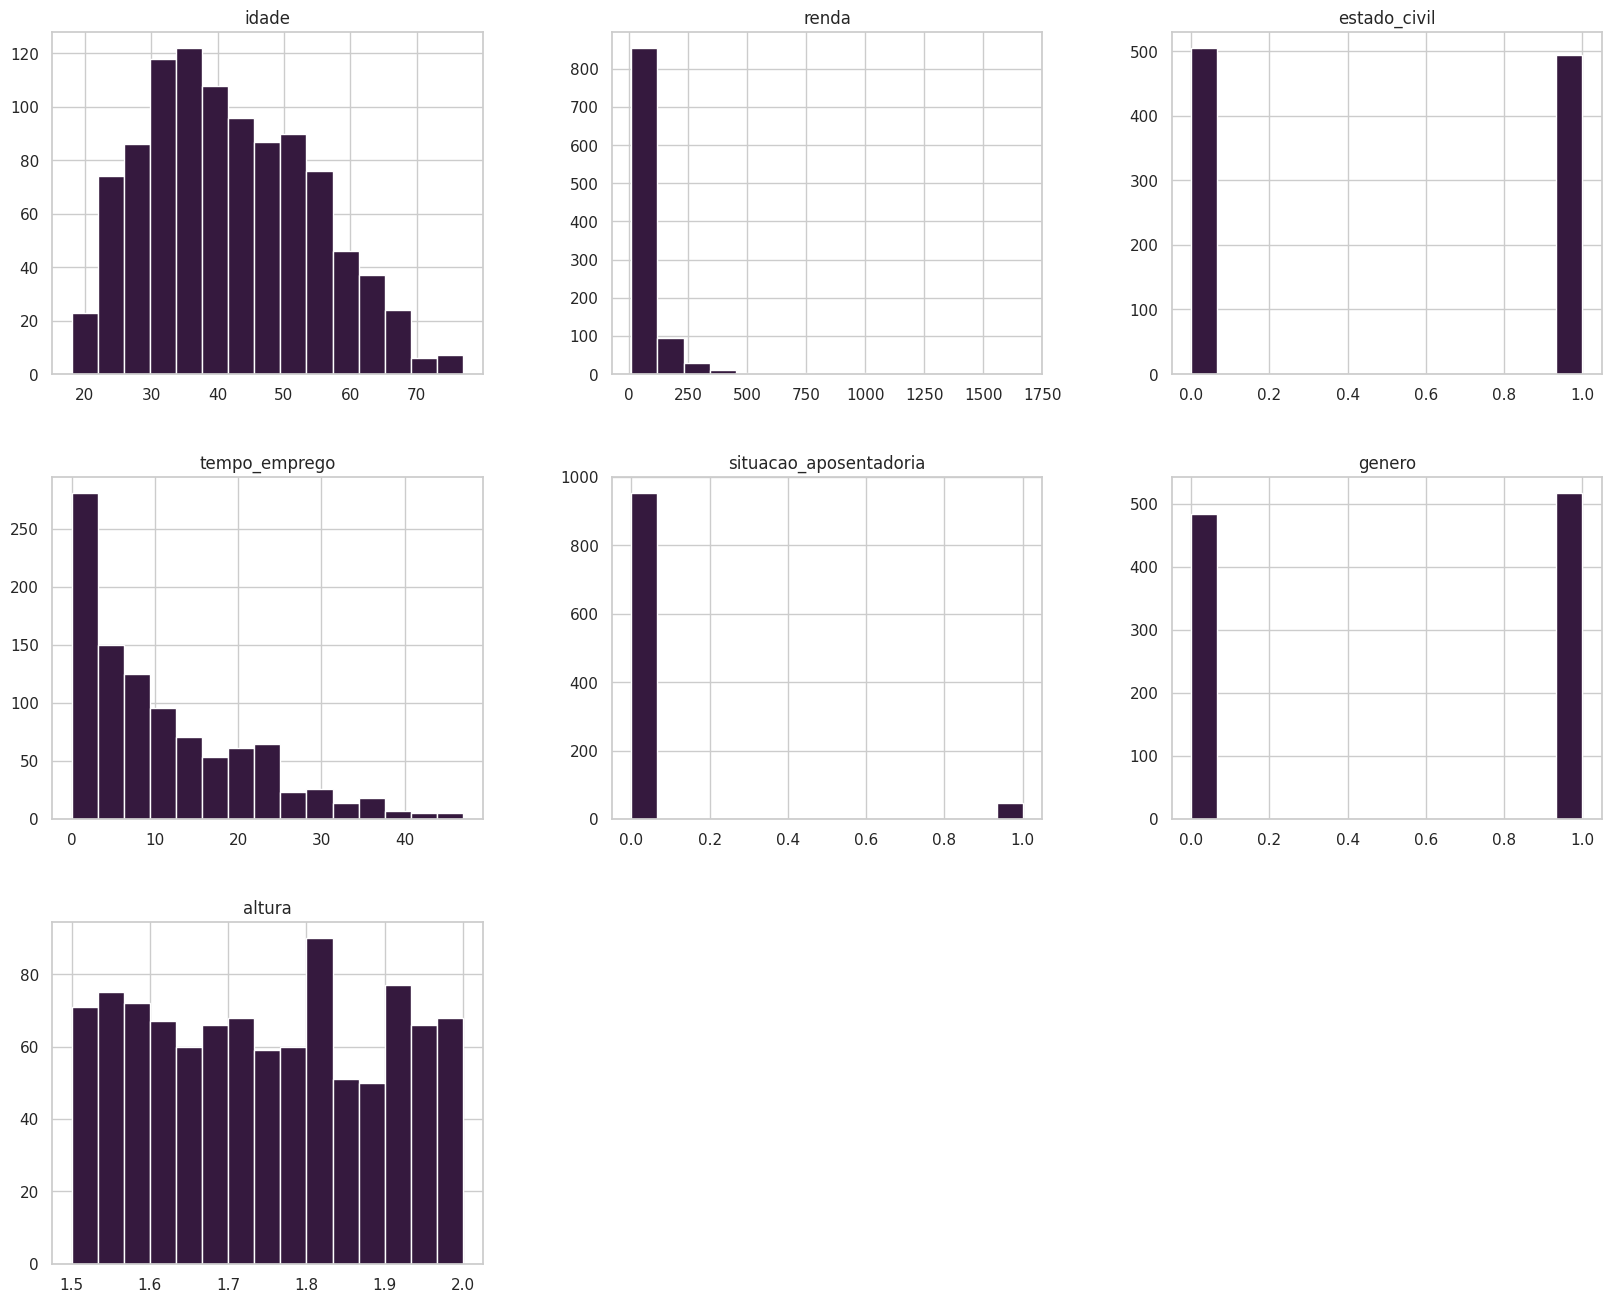

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,16));

###**Q4. Quais variáveis têm mais correlação?**


---



In [10]:
df.renda.describe()

,renda
count,1000.000000
mean,77.535000
std,107.044165
min,9.000000
25%,29.000000
50%,47.000000
75%,83.000000
max,1668.000000


In [9]:
numerical_df = df.select_dtypes(include=['number'])

corr = numerical_df.corr()

corr

,idade,renda,estado_civil,tempo_emprego,situacao_aposentadoria,genero,altura
idade,1.000000,0.327948,-0.014433,0.670047,0.429440,-0.011419,0.003375
renda,0.327948,1.000000,-0.043984,0.516349,-0.083651,0.038706,0.002035
estado_civil,-0.014433,-0.043984,1.000000,-0.002891,-0.078109,0.008345,-0.033700
tempo_emprego,0.670047,0.516349,-0.002891,1.000000,0.277401,0.046016,0.005024
situacao_aposentadoria,0.429440,-0.083651,-0.078109,0.277401,1.000000,0.053906,0.017620
genero,-0.011419,0.038706,0.008345,0.046016,0.053906,1.000000,-0.002522
altura,0.003375,0.002035,-0.033700,0.005024,0.017620,-0.002522,1.000000


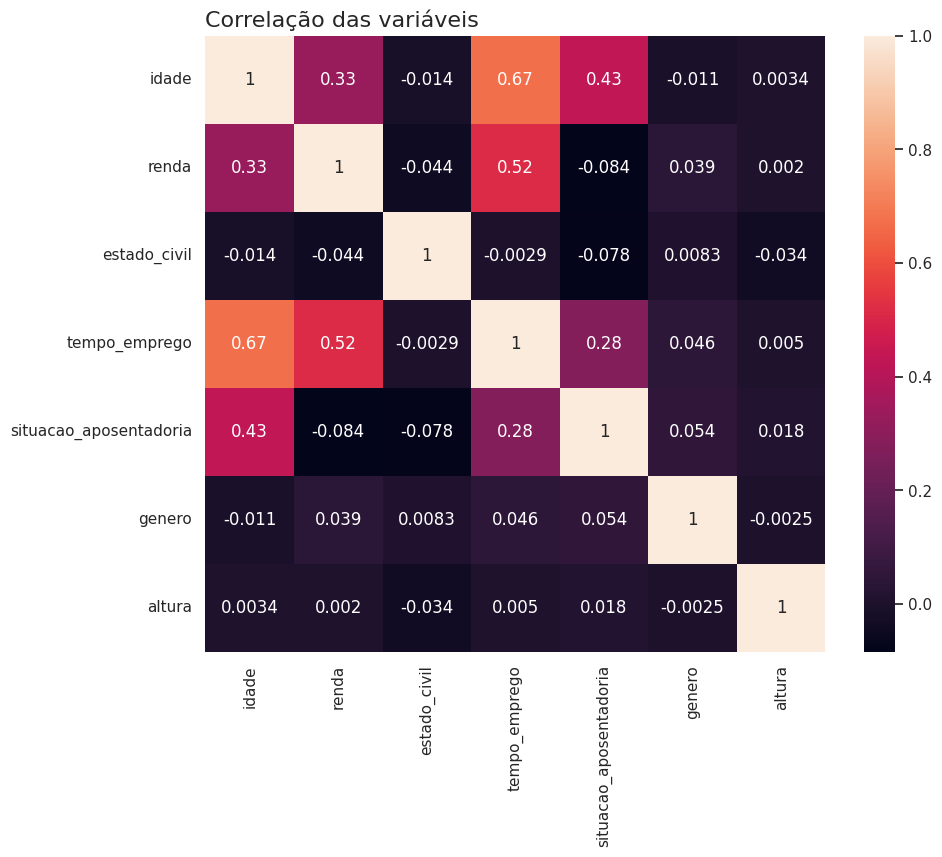

In [10]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

###**Principais Relações com a Renda**


**Idade e Renda (0.33):** Existe uma correlação positiva moderada entre a idade e a renda. Isso sugere que, à medida que as pessoas envelhecem, tendem a ter rendas mais altas.


**Tempo de Emprego e Renda (0.52):** A correlação entre tempo de emprego e renda é a mais forte no gráfico. Isso faz sentido, pois maior tempo de trabalho pode estar associado a experiência e salários mais elevados.


**Situação de Aposentadoria e Renda (-0.084):** Existe uma correlação negativa, embora fraca, sugerindo que pessoas aposentadas podem ter uma renda um pouco menor.

###**Outras Relações Relevantes**


**Idade e Tempo de Emprego (0.67):** Há uma correlação forte entre essas variáveis, o que é esperado, pois pessoas mais velhas normalmente têm mais tempo de trabalho acumulado.


**Idade e Situação de Aposentadoria (0.43):** Existe uma correlação positiva entre idade e a situação de aposentadoria, indicando que pessoas mais velhas têm mais probabilidade de estarem aposentadas.

###**Relações Fracas ou Irrelevantes**


- Variáveis como **altura** e **gênero** têm correlações extremamente baixas com **renda**, **idade** e outras variáveis, o que indica que elas não têm um impacto relevante no comportamento das demais variáveis.


- **Estado Civil** também apresenta correlação próxima de zero com renda, idade e outras variáveis

### **Q5. Renda e Tempo de Emprego por Região**


<Figure size 1000x600 with 0 Axes>

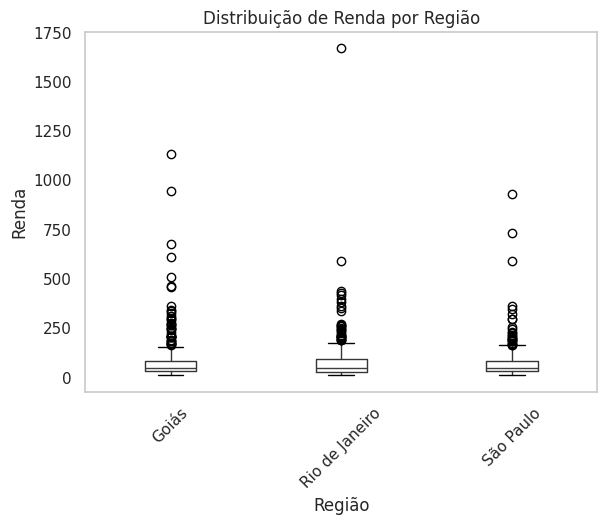

<Figure size 1000x600 with 0 Axes>

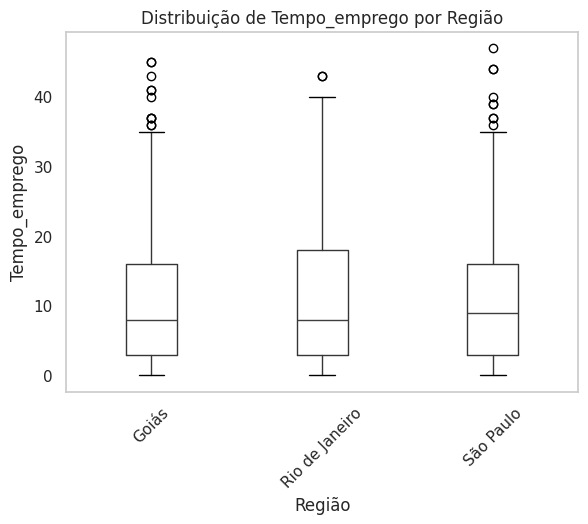

In [11]:
for col in ['renda', 'tempo_emprego']:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=col, by='regiao', grid=False)
    plt.title(f'Distribuição de {col.capitalize()} por Região')
    plt.suptitle('')
    plt.xlabel('Região')
    plt.ylabel(col.capitalize())
    plt.xticks(rotation=45)
    plt.show()

### **Q6. Renda e Diferenças por Gênero**



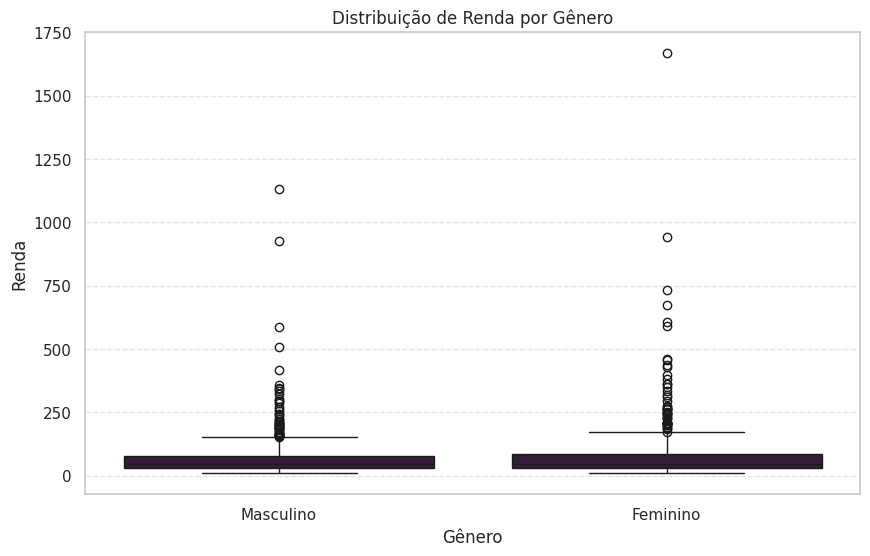

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genero', y='renda', data=df)
plt.title('Distribuição de Renda por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Renda')
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### **Q7. Correlação entre Idade e Tempo de Emprego**


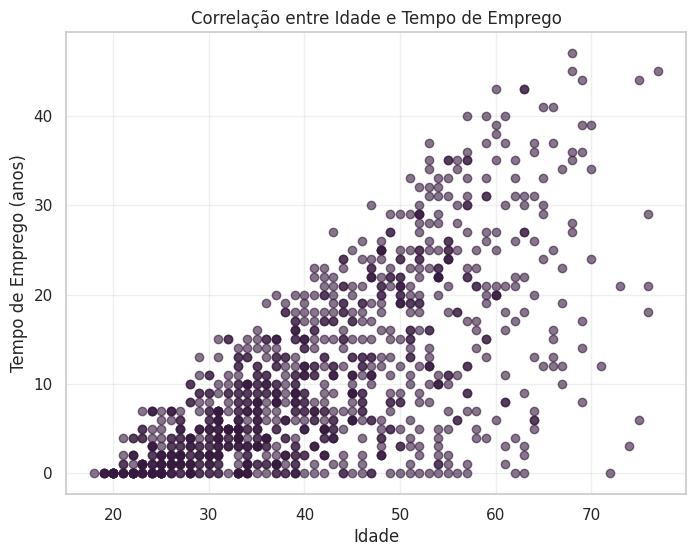

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['idade'], df['tempo_emprego'], alpha=0.6)
plt.title('Correlação entre Idade e Tempo de Emprego')
plt.xlabel('Idade')
plt.ylabel('Tempo de Emprego (anos)')
plt.grid(True, alpha=0.3)
plt.show()

### **Q8. Comparação de Renda por Nível Educacional**

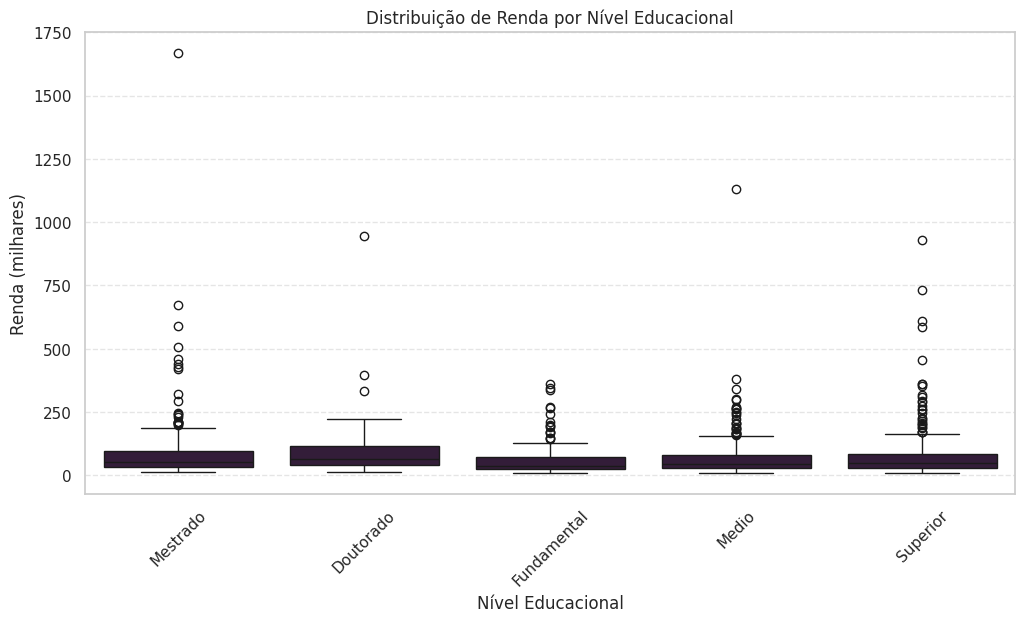

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='educacao', y='renda', data=df)
plt.title('Distribuição de Renda por Nível Educacional')
plt.xlabel('Nível Educacional')
plt.ylabel('Renda (milhares)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

<ipython-input-16-101d9dbbe677>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=renda_por_educacao.index, x=renda_por_educacao.values, orient='h', palette='rocket', ax=ax)


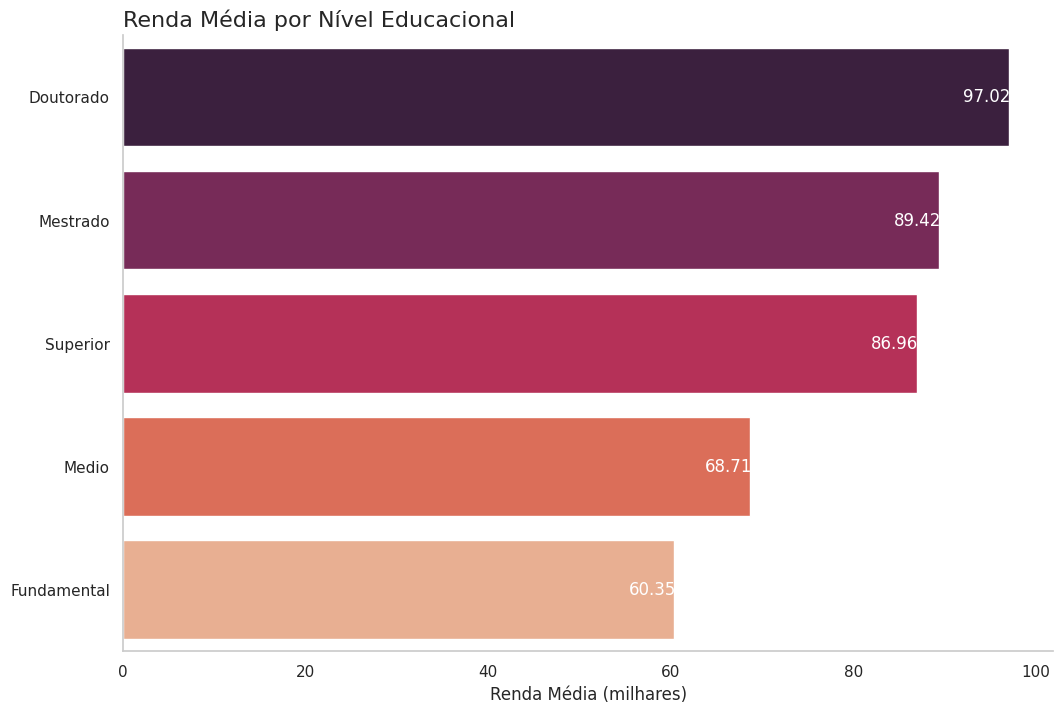

In [16]:
# Calcular renda média por nível educacional
renda_por_educacao = df.groupby('educacao')['renda'].mean().sort_values(ascending=False)

# Criar gráfico
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y=renda_por_educacao.index, x=renda_por_educacao.values, orient='h', palette='rocket', ax=ax)

# Título e ajustes
ax.set_title('Renda Média por Nível Educacional', loc='left', fontsize=16)
ax.set_xlabel('Renda Média (milhares)')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Adicionar valores nas barras
for i in range(renda_por_educacao.values.shape[0]):
    ax.text(renda_por_educacao.values[i] - 5, i, f'{round(renda_por_educacao.values[i], 2)}',
            fontsize=12, color='white', va='center')

plt.show()

### **Relação Positiva entre Educação e Renda**

Observa-se claramente que níveis mais altos de educação estão associados a uma renda média maior.
Pessoas com Doutorado têm a maior **renda média (97.02)**, seguidas por aqueles com **Mestrado (89.42)** e **Superior (86.96).**

### **Q9. Renda por estado civil**


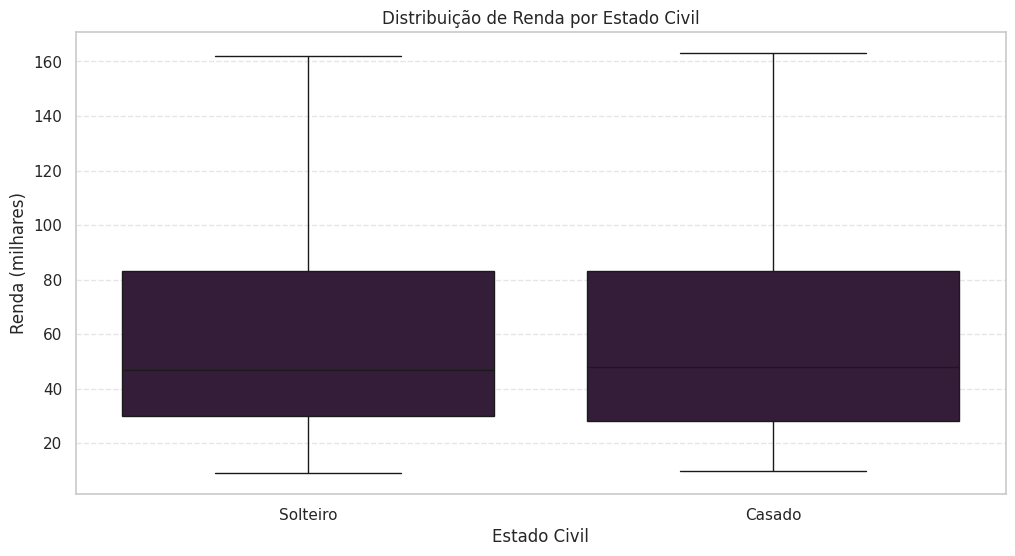

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='estado_civil', y='renda', data=df, showfliers=False)
plt.title('Distribuição de Renda por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Renda (milhares)')
plt.xticks(ticks=[0, 1], labels=['Solteiro', 'Casado'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### **Q10. Renda por tipo de residência**

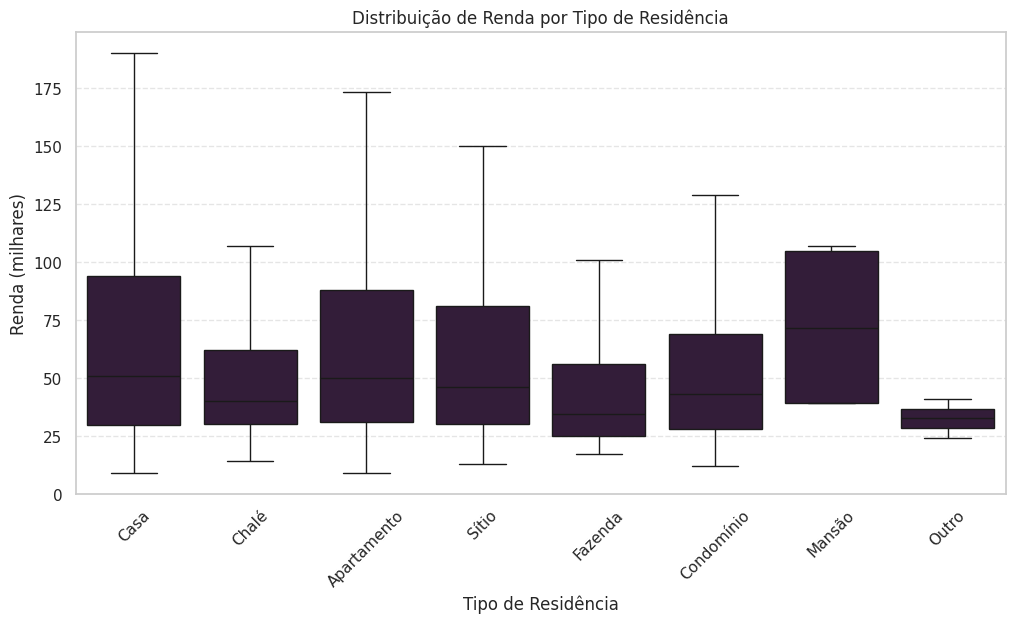

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='codigo_residencia', y='renda', data=df, showfliers=False)
plt.title('Distribuição de Renda por Tipo de Residência')
plt.xlabel('Tipo de Residência')
plt.ylabel('Renda (milhares)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

### **Análise dos outliers**

In [28]:
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

colunas_para_limpar = ['renda', 'tempo_emprego']
df_sem_outliers = df.copy()

for coluna in colunas_para_limpar:
    df_sem_outliers = remover_outliers_iqr(df_sem_outliers, coluna)

print(df_sem_outliers.describe())

            idade       renda  estado_civil  tempo_emprego  \
count  888.000000  888.000000    888.000000     888.000000   
mean    39.968468   52.929054      0.501126       8.804054   
std     11.918699   33.638682      0.500281       7.735182   
min     18.000000    9.000000      0.000000       0.000000   
25%     31.000000   28.000000      0.000000       2.000000   
50%     39.000000   43.000000      1.000000       7.000000   
75%     48.000000   67.000000      1.000000      13.000000   
max     76.000000  163.000000      1.000000      32.000000   

       situacao_aposentadoria      genero      altura  
count              888.000000  888.000000  888.000000  
mean                 0.034910    0.506757    1.744718  
std                  0.183655    0.500236    0.146442  
min                  0.000000    0.000000    1.500000  
25%                  0.000000    0.000000    1.617500  
50%                  0.000000    1.000000    1.750000  
75%                  0.000000    1.000000    1.87

In [29]:
df_clean = df.copy()

colunas_para_limpar = ['renda', 'tempo_emprego']

for coluna in colunas_para_limpar:
    Q1 = df_clean[coluna].quantile(0.25)
    Q3 = df_clean[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[coluna] >= limite_inferior) & (df_clean[coluna] <= limite_superior)]

print(f'O dataset original possui {df.shape[0]} amostras')
print(f'O dataset limpo agora possui {df_clean.shape[0]} amostras')

O dataset original possui 1000 amostras
O dataset limpo agora possui 888 amostras


### **Como fica o dataset sem outliers???**

In [24]:
df_clean.describe()

,idade,renda,estado_civil,tempo_emprego,situacao_aposentadoria,genero,altura
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,39.968468,52.929054,0.501126,8.804054,0.034910,0.506757,1.744718
std,11.918699,33.638682,0.500281,7.735182,0.183655,0.500236,0.146442
min,18.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,31.000000,28.000000,0.000000,2.000000,0.000000,0.000000,1.617500
50%,39.000000,43.000000,1.000000,7.000000,0.000000,1.000000,1.750000
75%,48.000000,67.000000,1.000000,13.000000,0.000000,1.000000,1.870000
max,76.000000,163.000000,1.000000,32.000000,1.000000,1.000000,2.000000


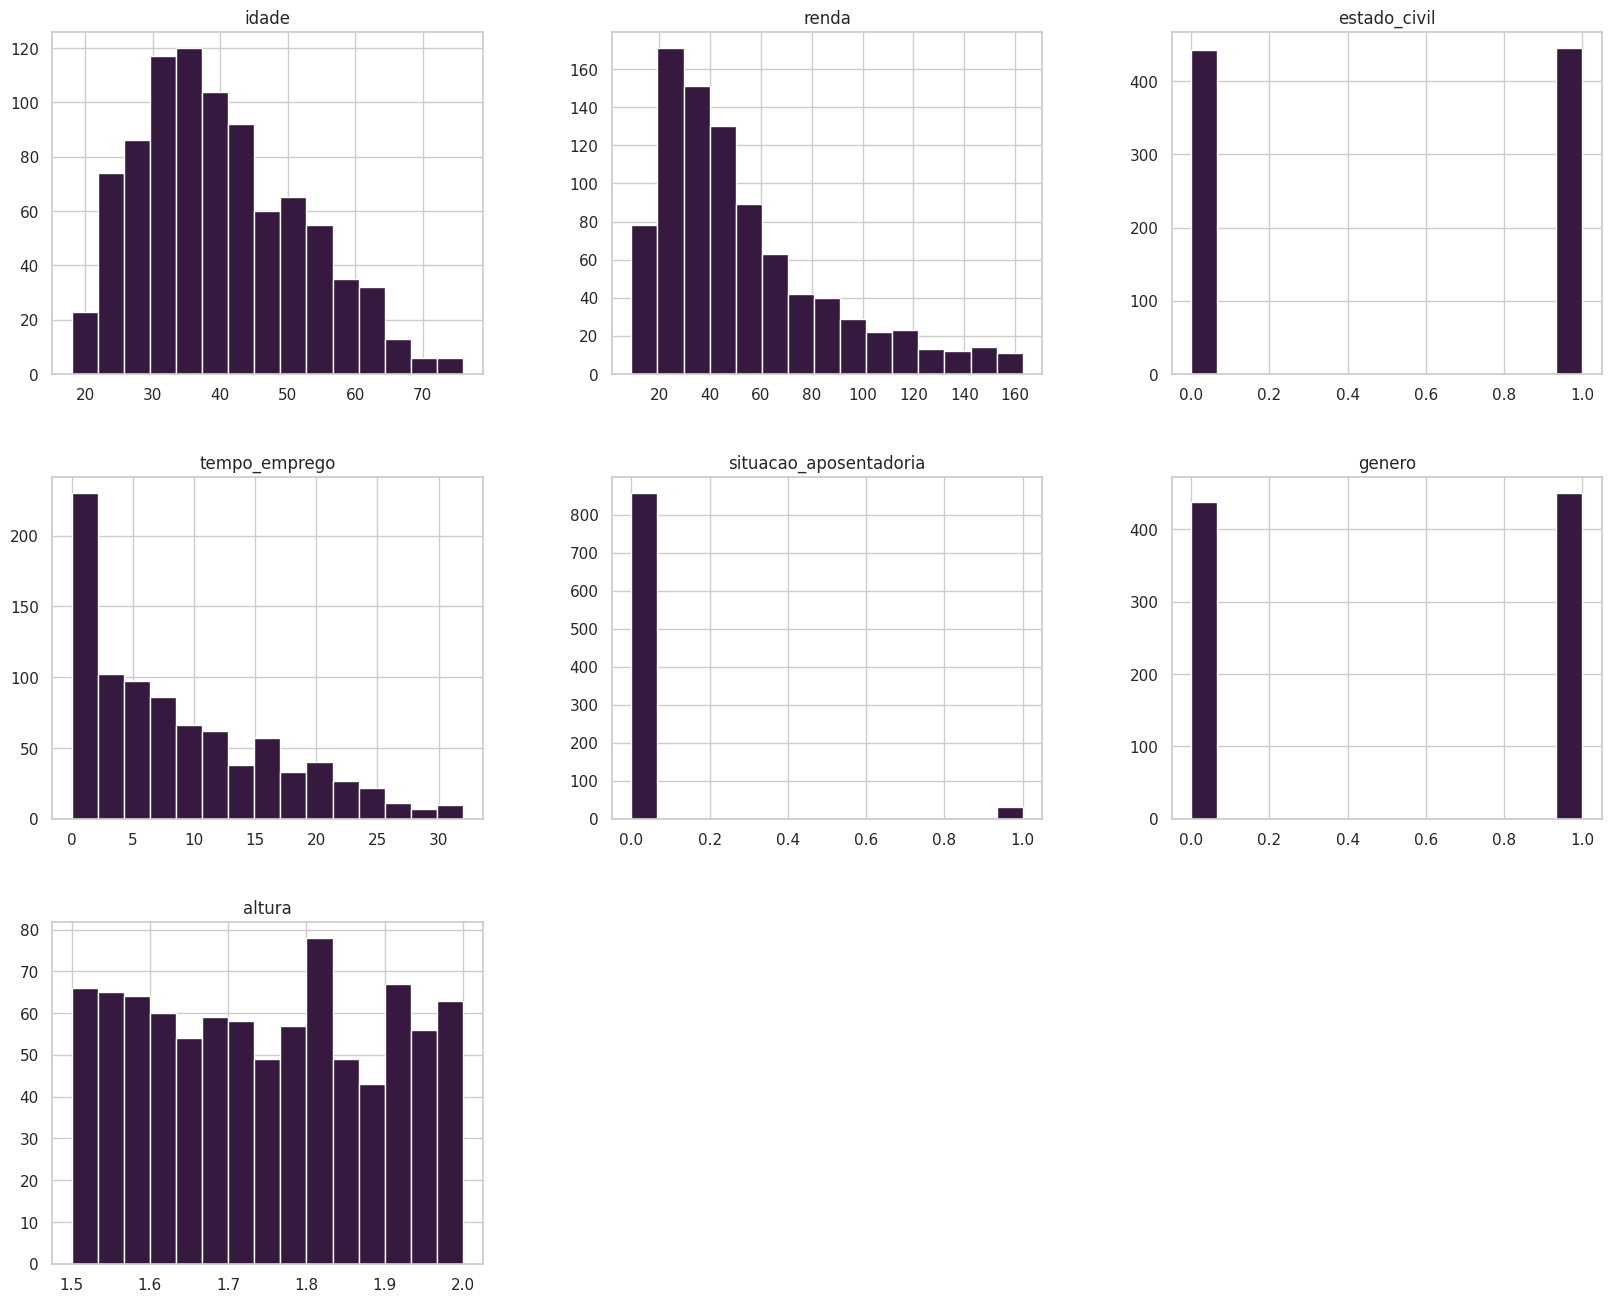

In [25]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(20,16));

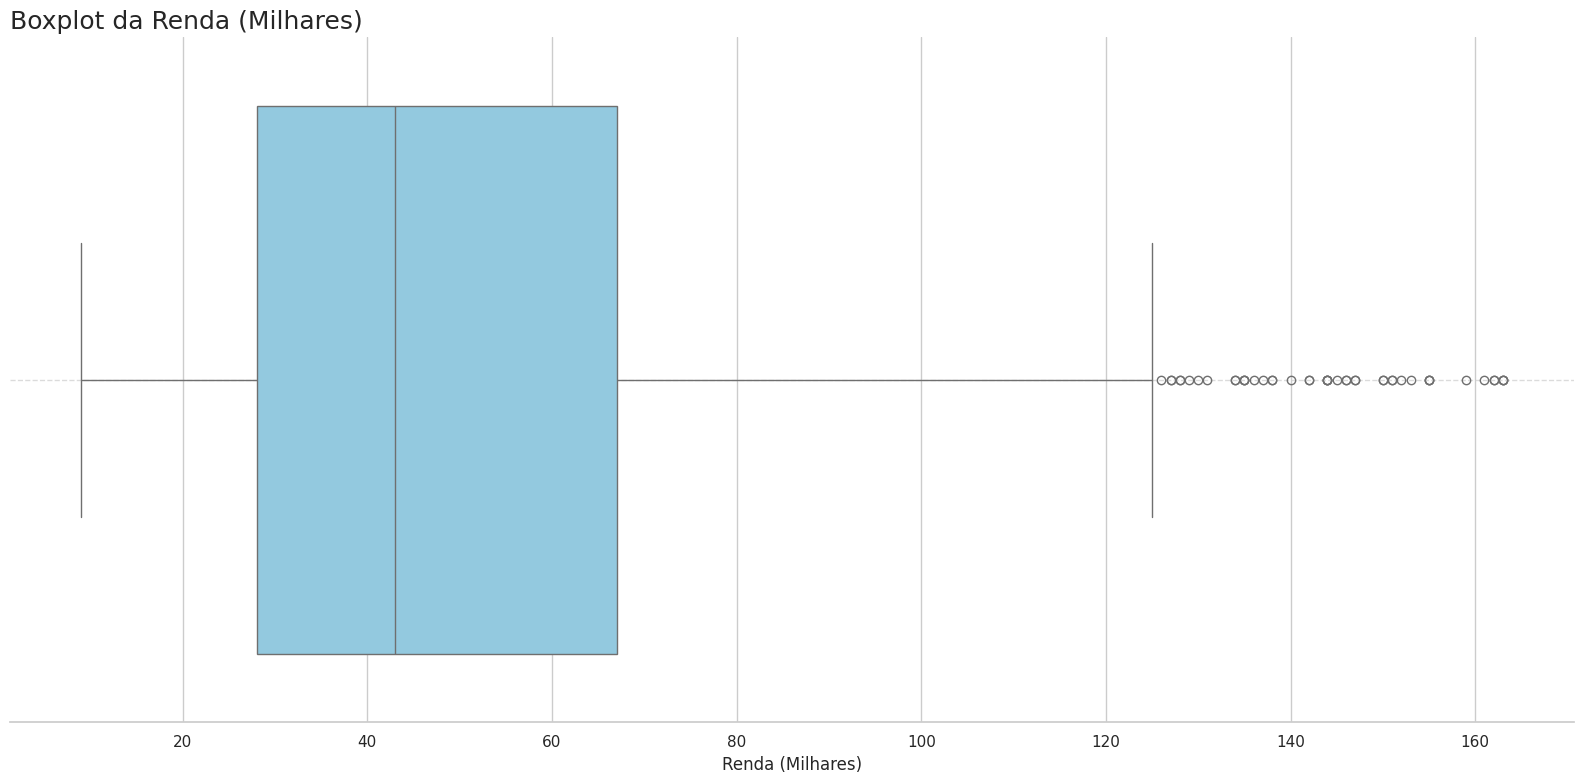

In [27]:
fig, ax = plt.subplots(figsize=(16, 8))

ax = sns.boxplot(data=df_clean, x='renda', color='skyblue')
ax.set_title('Boxplot da Renda (Milhares)', loc='left', fontsize=18)
ax.set_xlabel('Renda (Milhares)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


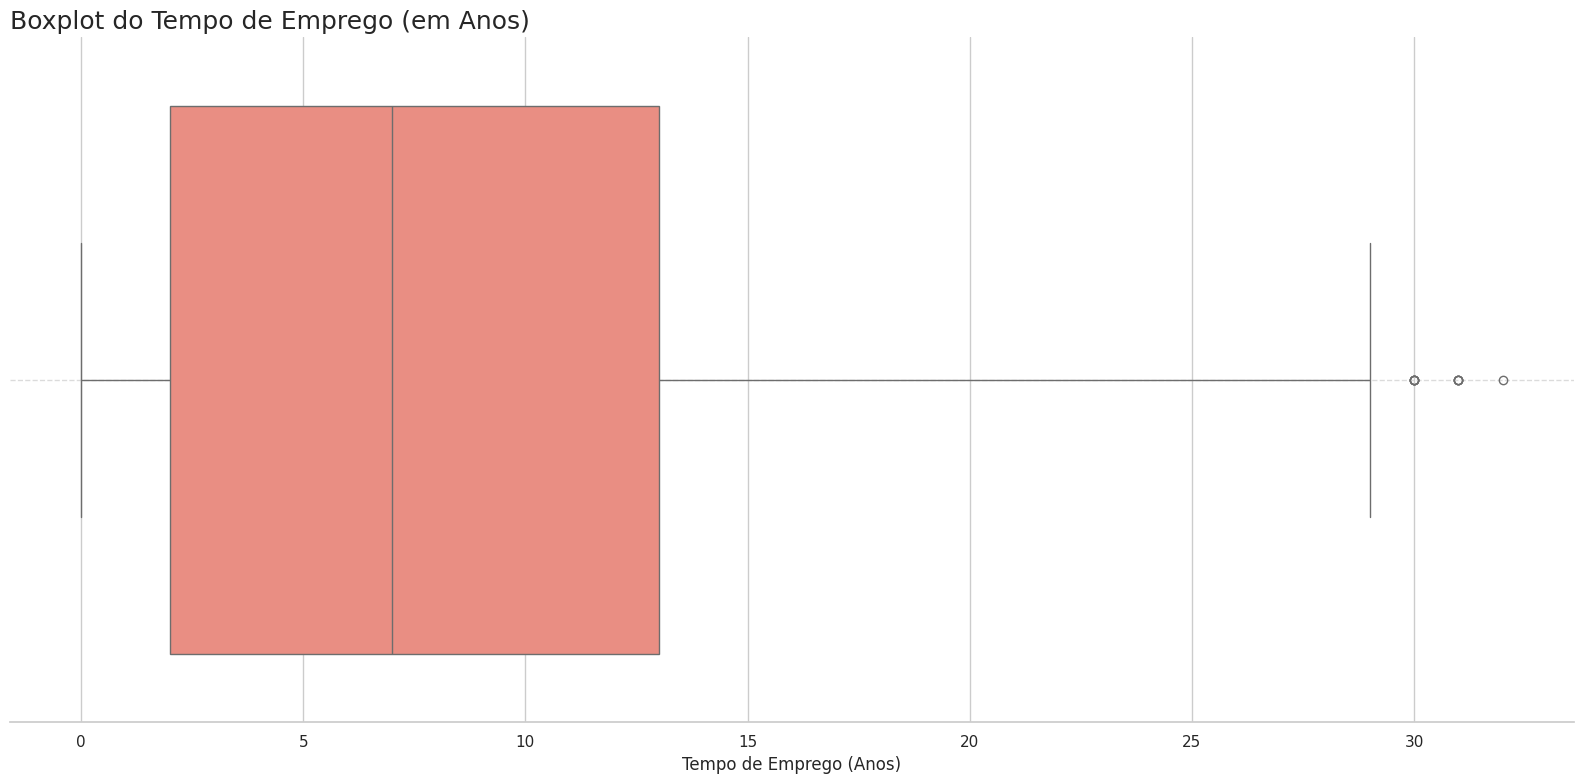

In [30]:
fig, ax = plt.subplots(figsize=(16, 8))

ax = sns.boxplot(data=df_clean, x='tempo_emprego', color='salmon')
ax.set_title('Boxplot do Tempo de Emprego (em Anos)', loc='left', fontsize=18)
ax.set_xlabel('Tempo de Emprego (Anos)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [31]:
# Cálculo de correlação
corr = df_clean.select_dtypes(include=['number']).corr()

print(f'Valor absoluto da correlação dos atributos com a renda:')
corr.renda.abs().sort_values(ascending=False)[1:]

Valor absoluto da correlação dos atributos com a renda:


,renda
tempo_emprego,0.557480
idade,0.308086
situacao_aposentadoria,0.176612
altura,0.012416
estado_civil,0.009819
genero,0.004819


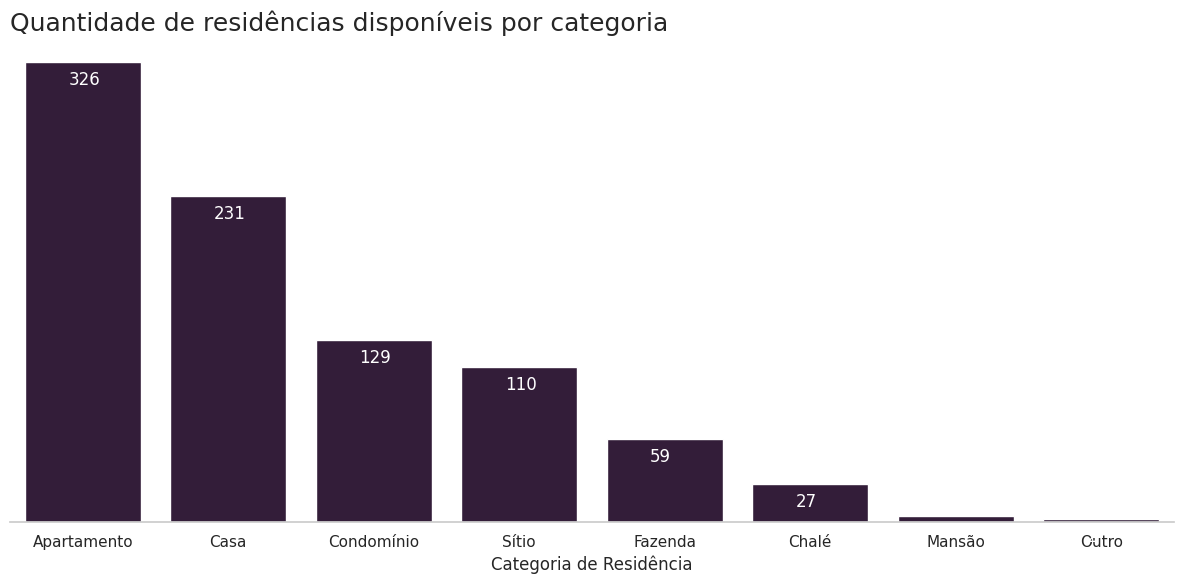

In [32]:
# Quantidade de residências disponíveis por categoria
qt_residencia = df_clean.codigo_residencia.value_counts()

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x=qt_residencia.index, y=qt_residencia.values)

ax.set_title('Quantidade de residências disponíveis por categoria', loc='left', fontsize=18)
ax.set_xlabel('Categoria de Residência')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(qt_residencia.values.shape[0]):
  ax.text(i-.1, qt_residencia.values[i] - qt_residencia.values.max() * 0.05,
          f'{qt_residencia.values[i]}', fontsize=12, color='white')

plt.tight_layout()
plt.show()

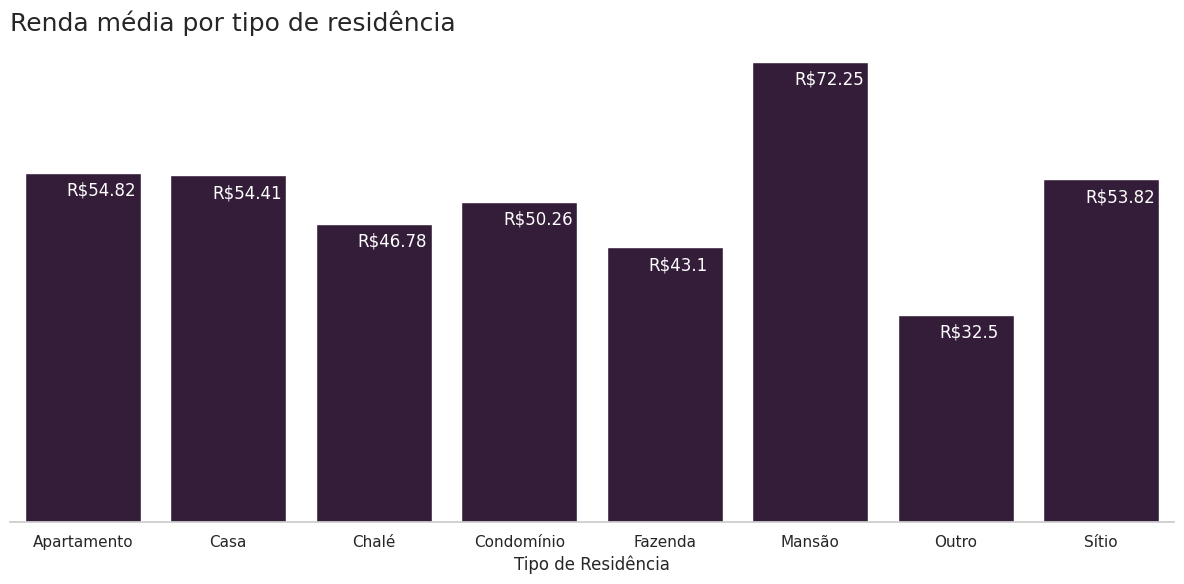

In [33]:
# Renda média por tipo de residência
renda_media = df_clean.groupby('codigo_residencia').renda.mean()

fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x=renda_media.index, y=renda_media.values)
ax.set_title('Renda média por tipo de residência', loc='left', fontsize=18)
ax.set_xlabel('Tipo de Residência')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft = False)
ax.grid(False)

for i in range(renda_media.values.shape[0]):
  ax.text(i-.11, renda_media.values[i] - renda_media.values.max() * 0.05,
          f'R${round(renda_media.values[i], 2)}', fontsize=12, color='white')

plt.tight_layout()
plt.show()

<ipython-input-39-37260ce6c874>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=renda_por_regiao.index, x=renda_por_regiao.values, orient='h', palette='rocket')


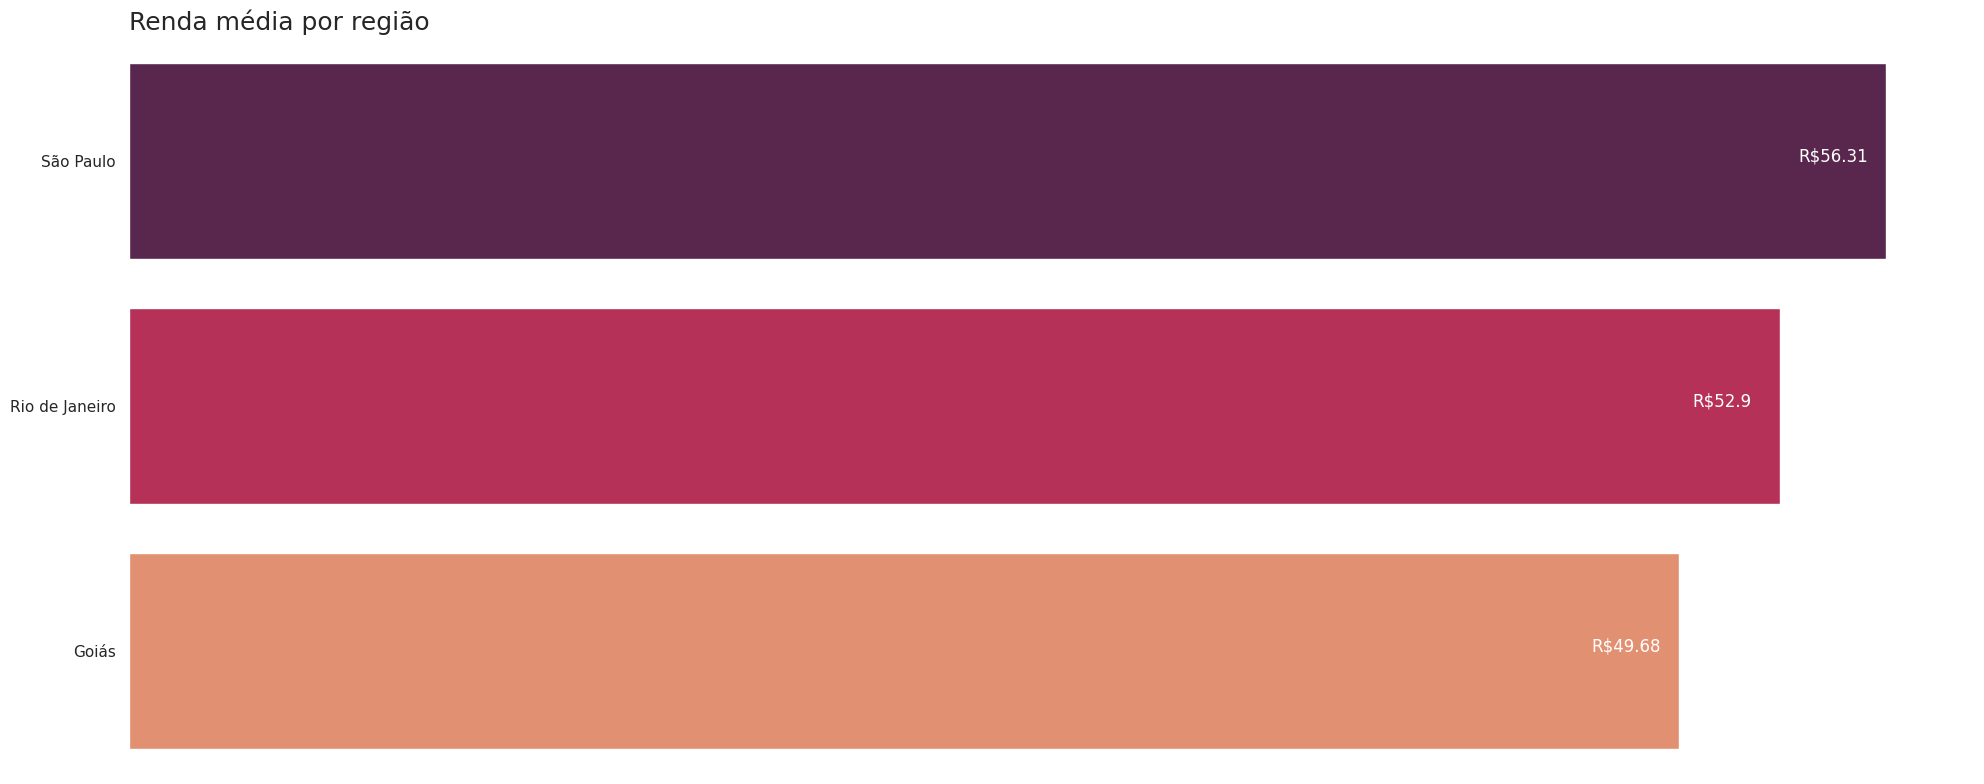

In [ ]:
# Análise da renda média por região
renda_por_regiao = df_clean.groupby('regiao').renda.mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(y=renda_por_regiao.index, x=renda_por_regiao.values, orient='h', palette='rocket')

ax.set_title('Renda média por região', loc='left', fontsize=18)
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelbottom=False)
ax.grid(False)

for i in range(renda_por_regiao.values.shape[0]):
    ax.text(renda_por_regiao.values[i] - renda_por_regiao.values.max() * 0.05, i,
            f'R${round(renda_por_regiao.values[i], 2)}', fontsize=12, color='white')

plt.tight_layout()
plt.show()

# **Conclusões**

Este estudo mostra que a renda varia significativamente entre as regiões, refletindo diferenças econômicas e sociais.

**1. Educação e Renda**


**Níveis Educacionais e Renda:**


Há uma relação clara entre níveis educacionais mais elevados e renda média maior.
Indivíduos com Doutorado ou Mestrado possuem as maiores rendas médias, enquanto aqueles com Ensino Fundamental têm as menores.
Conclusão Prática: A educação é um fator importante na melhoria do nível de renda e pode ser usada como um indicador para políticas públicas e decisões de carreira.


**2. Gênero e Renda**


**Distribuição de Renda por Gênero:**


Não houve uma disparidade evidente de renda entre gêneros, mas essa conclusão deve ser aprofundada, analisando outros fatores como nível educacional ou tempo de emprego por gênero.

Conclusão Prática: A ausência de grandes diferenças pode indicar um ambiente de igualdade salarial, mas a análise pode ser refinada para confirmar esse ponto.


**3. Tempo de Emprego, Idade e Renda**

**Tempo de Emprego como Indicador de Renda:**


Existe uma correlação moderada entre tempo de emprego e renda (0.52). Isso sugere que, à medida que o tempo de emprego aumenta, a renda também cresce, possivelmente devido a promoções e maior experiência.


**Idade e Tempo de Emprego:**


Há uma forte correlação (0.67) entre idade e tempo de emprego, o que reforça a expectativa de que trabalhadores mais velhos possuem carreiras mais longas e, muitas vezes, maior estabilidade.

**4. Região e Diferenças de Perfil**


**Renda por Região:**


Embora a análise das diferenças de renda entre regiões tenha sido feita, ela não apresentou disparidades tão significativas, sugerindo que os fatores educacionais e de experiência pessoal podem ser mais determinantes.